In [1]:
import numpy as np
import pandas as pd

In [2]:
#RAW DATA FROM SCRAPPIN
df= pd.read_csv('/home/gibeon/Desktop/MY/fvldata/STORAGE/TABLES/pTable001.csv')

#df['Pos'] = df.index
#df.reset_index(level=0, inplace=True)

#df['INDX'] = pd.Series(list(range(len(df['Team']))))
df.head()    ####  REMOVE DIFF,one of WDL,

,Pos,Dir,Team,P,W,D,L,GF,GA,DIFF,Points,Season
0,1,-1,VL Moscow,12,8,1,3,21,9,12,25,Season 12657
1,2,1,VL Rome,12,7,2,3,22,16,6,23,Season 12657
2,3,0,VL London,12,7,2,3,19,17,2,23,Season 12657
3,4,-1,VL Copenhagen,12,6,3,3,11,10,1,21,Season 12657
4,5,0,VL Madrid,12,5,5,2,23,13,10,20,Season 12657


In [3]:
# df2 = df.set_index(['P', 'Pos'],drop=False)  ##interesing stuff
# df2.head()


In [4]:
#team_cat = df['Team'].astype('category')
#team_cat

In [5]:
#df['Team'] = team_cat

In [6]:
#df.head()
df['Team'].unique()

array(['VL Moscow', 'VL Rome', 'VL London', 'VL Copenhagen', 'VL Madrid',
       'VL Berlin', 'VL Kiev', 'VL Amsterdam', 'VL Bern', 'VL Vienna',
       'VL Lisbon', 'VL Athens', 'VL Paris', 'VL Zagreb', 'VL Prague',
       'VL Ankara'], dtype=object)

In [7]:
def teamCoded(S):
    
#     cats=['MADRID', 'AMSTERDAM','BERLIN','LONDON','ROME','OSLO','LISBON','PARIS','BRUSSELS','ATHENS','STOCKHOLM',
#           'COPENHAGEN','VIENNA', 'ANKARA','EDINBURGH','BERN']
    
    cats=['MADRID', 'AMSTERDAM','BERLIN','LONDON','ROME','MOSCOW','LISBON','PARIS','ZAGREB','ATHENS','PRAGUE',
          'COPENHAGEN','VIENNA', 'ANKARA','KIEV','BERN']

    catsRev=[]
    for tm in S:
        if tm == cats[0]:
            catsRev.append(1)
        elif tm == cats[1]:
            catsRev.append(2)
        elif tm == cats[2]:
            catsRev.append(3)
        elif tm == cats[3]:
            catsRev.append(4)
        elif tm == cats[4]:
            catsRev.append(5)
        elif tm == cats[5]:
            catsRev.append(6)
        elif tm == cats[6]:
            catsRev.append(7)
        elif tm == cats[7]:
            catsRev.append(8)
        elif tm == cats[8]:
            catsRev.append(9)
        elif tm == cats[9]:
            catsRev.append(10)
        elif tm == cats[10]:
            catsRev.append(11)
        elif tm == cats[11]:
            catsRev.append(12)
        elif tm == cats[12]:
            catsRev.append(13)
        elif tm == cats[13]:
            catsRev.append(14)
        elif tm == cats[14]:
            catsRev.append(15)
        elif tm == cats[15]:
            catsRev.append(16)
    return catsRev


df['TEAM']=pd.Series([x.split()[1].upper() for x in df.Team])
df['HOMECODE']=teamCoded(df['TEAM'])
df['AWAYCODE']=teamCoded(df['TEAM'])
#df['TEAM']
#df.TEAM
#df #.head()

In [8]:
df.head()

,Pos,Dir,Team,P,W,D,L,GF,GA,DIFF,Points,Season,TEAM,HOMECODE,AWAYCODE
0,1,-1,VL Moscow,12,8,1,3,21,9,12,25,Season 12657,MOSCOW,6,6
1,2,1,VL Rome,12,7,2,3,22,16,6,23,Season 12657,ROME,5,5
2,3,0,VL London,12,7,2,3,19,17,2,23,Season 12657,LONDON,4,4
3,4,-1,VL Copenhagen,12,6,3,3,11,10,1,21,Season 12657,COPENHAGEN,12,12
4,5,0,VL Madrid,12,5,5,2,23,13,10,20,Season 12657,MADRID,1,1


In [9]:
df1 = df[df.isna().any(axis=1)]

In [10]:
df1

,Pos,Dir,Team,P,W,D,L,GF,GA,DIFF,Points,Season,TEAM,HOMECODE,AWAYCODE


In [11]:
dfR= pd.read_csv('/home/gibeon/Desktop/MY/fvldata/STORAGE/TABLES/pResu001.csv')

#dfR= pd.read_csv('/home/ideon/Desktop/DATA CENTRE/resultDataR.csv')
dfR.head()

,TIMER,TEAMSr,HTR,FTR,P,Season
0,17/07/19 08:10,VL Berlin - VL Athens,2:0,4:0,1,Season 12657
1,17/07/19 08:10,VL Zagreb - VL Paris,1:3,1:3,1,Season 12657
2,17/07/19 08:10,VL Copenhagen - VL Moscow,0:0,1:0,1,Season 12657
3,17/07/19 08:10,VL London - VL Rome,0:0,2:0,1,Season 12657
4,17/07/19 08:10,VL Bern - VL Kiev,2:0,4:0,1,Season 12657


In [12]:


#function to input(ps) DF column of form/content (3:2) eg HT result or HT results and out put ps.series with eithe 0,1 or 2
def results(ps):

    #ps = ps.dropna()
    lp=[]
    for x in ps:
       # print(x)
        
        h=x.replace(':','  ')[:1]
      #  print(h)
        a=x.replace(':','  ')[1:]
        if float(h) > float(a):
            lp.append(1)

        elif float(a) > float(h):
            lp.append(2)
        else:
            lp.append(0)

    return pd.Series(lp)



def over_under(ps,n):
    lp=[]
    for x in ps:
        h=x.replace(':','  ')[:1]
        a=x.replace(':','  ')[1:]
        # if goals sum is greater than n value is 1
        
        if (float(h) + float(a)) > float(n):
            lp.append(1)

        else:
            #means it is under n eg under 2.5
            lp.append(0)

    return pd.Series(lp)

##addition collumn of all goals
def goalsum(ps):
    lp=[]
    for x in ps:
        h=x.replace(':','  ')[:1]
        a=x.replace(':','  ')[1:]
        # if goals sum is greater than n value is 1
        
        lp.append((float(h) + float(a)))

    return pd.Series(lp)

In [13]:
'''
#split TEAMS into HOME & AWAY 
df['HOME']=pd.Series([x.split()[1] for x in df.TEAMSd])
df['AWAY']=pd.Series([x.split()[3] for x in df.TEAMSd])
df['TIMEdd']=pd.Series([x.split()[1] for x in df.TIMED])
df['TIMEst']=pd.Series([x.split()[0] for x in df.timestamp])
df['TIMEfc']=pd.Series([p[3:][5:8]+p[2:][:4]+p[:][:2] for p in df.TIMEst])
#df['TIMEddR']=pd.Series([x.split()[1] for x in df.TIMEDdd])
##

lx=[]
for x in df.TIMED:
    p=x.split()[1].replace(':','.')
    if float(p)> 1.00:
        q=('0'+str((round((float(p.replace(':','.'))-1),2))).replace('.',':')+'0')[:5]
    
    else:
        p=float(p)+24.00
        q=str((float(str(p).replace(':','.'))-1)).replace('.',':') 
    lx.append(q)



# time equating CODE (fx) for discrepancies in time between DATA and RESU to enable DF matching
lx=[]
for x in df.TIMED:
    p=x.split()[1].replace(':','.')
   # print('P:',p)
    if float(p)> 1.59:
        if float(p) < 12 and float(p) > 1.59:
            #process tine between 2 -12 
            q1=('0'+ str((round((float(p.replace(':','.'))-2),2))).replace('.',':')+'0')[:5]# minus 2 hrs.Resu is 2 hrs behind
            if len(q1) == 4:
                q = q1+ '0'
            else:
                q = q1
          
        else:
            #process te rest of te time
            q1=(str((round((float(p)-2),2))).replace('.',':')+'0')[:5] # minus 2 hrs.Resu is 2 hrs behind
            if len(q1) == 4:
                q = q1+ '0'
            else:
                q = q1
                                          
        
      #  print('PQ:',p,q)
    
    else:
        # process time b/w 00:00 to 2 :00
        p1= float(p)
        p= p1 +24.00                    
        q1= str((float(str(p).replace(':','.'))-2)).replace('.',':') # minus 2 hrs.Resu is 2 hrs behind
        #if q >= 24
        if len(q1) ==4:
            q = q1+ '0'
        else:
            q = q1
       #print('PQ:',p1,q)
      
    lx.append(q)
    
''' 

   
'''    
df['TIMEr']=pd.Series(lx)

df['TIMER']=df['TIMEfc']  + ' ' + df['TIMEdd']


#Use teamCode FX to code HOME & AWAY collumns and crean new HOMECODE & AWAYCODE
df['HOMECODE']=teamCoded(df['HOME'])
df['AWAYCODE']=teamCoded(df['AWAY'])
#df['TEAMSC']=df['HOMECODE'] + df['AWAYCODE']
df['TC']=df['HOME']+' '+df['AWAY']
colum=['TC','HOMECODE', 'AWAYCODE','TIMER','TIMED','TIMEr',
'1', '2', 'X', 'HT1', 'HT2', 'HTX', 'FS (0:0)', 'FS(0:0)2', 'FS(0:0)X',
        'G(0.5)O', 'G(0.5)U', 'G(1.5)O', 'G(1.5)U', 'G(2.5)O',
       'G(2.5)U', 'G(3.5)O', 'G(3.5)U', 'G(4.5)O', 'G(4.5)U']
data=df.reindex(columns=colum).fillna(0)
'''
#======================================================================
dfR['TEAMSr']
dfR['TEAMSr']=pd.Series([x.upper() for x in dfR.TEAMSr])
dfR['TEAMSr']=pd.Series([x.upper() for x in dfR.TEAMSr])
#split TEAMS into HOME & AWAY 
dfR['HOME']=pd.Series([x.split()[1] for x in dfR.TEAMSr]) 
dfR['AWAY']=pd.Series([x.split()[4] for x in dfR.TEAMSr])

dfR['TIMEr']=pd.Series([x.split()[1] for x in dfR.TIMER])
#Use teamCode FX to code HOME & AWAY collumns and crean new HOMECODE & AWAYCODE
dfR['TC']=dfR['HOME']+' '+dfR['AWAY']

dfR['HOMECODE']=teamCoded(dfR['HOME'])
dfR['AWAYCODE']=teamCoded(dfR['AWAY'])
#dfR['TEAMSC']=dfR['HOMECODE'] + dfR['AWAYCODE']
#teamCode(dfR['HOME'])


    
dfR['FT_Goals']=pd.Series([str(x).replace(':','  ')[:] for x in dfR.FTR])
dfR['HT_Goals']=pd.Series([str(x).replace(':','  ')[:] for x in dfR.HTR])
dfR['FT_home_goals']=pd.Series([str(x).replace(':','  ')[:1] for x in dfR.FTR])
dfR['FT_away_goals']=pd.Series([str(x).replace(':','  ')[1:] for x in dfR.FTR])
dfR['HT_home_goals']=pd.Series([str(x).replace(':','  ')[:1] for x in dfR.HTR])
dfR['HT_away_goals']=pd.Series([str(x).replace(':','  ')[1:] for x in dfR.HTR])



dfR['FT_Results_1_0_2']=results(dfR['FT_Goals'])
dfR['HT_Results_1_0_2']=results(dfR['HT_Goals'])


# FT UNDER /OVER Goals
p = 3.5
n = 2.5
q = 1.5

dfR['Under_Over_3.5']= over_under(dfR['FT_Goals'],p)
dfR['Under_Over_2.5']= over_under(dfR['FT_Goals'],n)
dfR['Under_Over_1.5']= over_under(dfR['FT_Goals'],q)



dfR['Sum_Goals']= goalsum(dfR['FT_Goals'])





dfR['Sum_Goals']= goalsum(dfR['FT_Goals'])# addition column of all goals

#dfR['HT_Results_1_0_2']=results(dfR['HT_Goals'])

colum=['P','Season','TC','HOMECODE', 'AWAYCODE','TIMEr','HTR', 'FTR', 'HT_home_goals', 'HT_away_goals',
       'FT_home_goals','FT_away_goals','Sum_Goals','HT_Results_1_0_2','FT_Results_1_0_2','Under_Over_1.5','Under_Over_2.5',
       'Under_Over_3.5']
resu= dfR.reindex(columns=colum).fillna(0)#.values


colum=['TC','HOMECODE', 'AWAYCODE','TIMEr','HTR', 'FTR', 'HT_home_goals', 'HT_away_goals',
       'FT_home_goals','FT_away_goals','HT_Results_1_0_2','FT_Results_1_0_2','TIMER','TIMED','1','2','X','HT1','HT2','HTX','FS (0:0)','FS(0:0)2','FS(0:0)X','G(0.5)O','G(0.5)U',
         'G(1.5)O','G(1.5)U','G(2.5)O','G(2.5)U','G(3.5)O','G(3.5)U','G(4.5)O','G(4.5)U','Under_Over_1.5','Under_Over_2.5',
       'Under_Over_3.5']

In [14]:
resu#.head()

,P,Season,TC,HOMECODE,AWAYCODE,TIMEr,HTR,FTR,HT_home_goals,HT_away_goals,FT_home_goals,FT_away_goals,Sum_Goals,HT_Results_1_0_2,FT_Results_1_0_2,Under_Over_1.5,Under_Over_2.5,Under_Over_3.5
0,1,Season 12657,BERLIN ATHENS,3,10,08:10,2:0,4:0,2,0,4,0,4.0,1,1,1,1,1
1,1,Season 12657,ZAGREB PARIS,9,8,08:10,1:3,1:3,1,3,1,3,4.0,2,2,1,1,1
2,1,Season 12657,COPENHAGEN MOSCOW,12,6,08:10,0:0,1:0,0,0,1,0,1.0,0,1,0,0,0
3,1,Season 12657,LONDON ROME,4,5,08:10,0:0,2:0,0,0,2,0,2.0,0,1,1,0,0
4,1,Season 12657,BERN KIEV,16,15,08:10,2:0,4:0,2,0,4,0,4.0,1,1,1,1,1
5,1,Season 12657,LISBON MADRID,7,1,08:10,2:1,3:3,2,1,3,3,6.0,1,0,1,1,1
6,1,Season 12657,AMSTERDAM PRAGUE,2,11,08:10,0:0,2:0,0,0,2,0,2.0,0,1,1,0,0
7,1,Season 12657,VIENNA ANKARA,13,14,08:10,0:0,2:0,0,0,2,0,2.0,0,1,1,0,0
8,2,Season 12657,ROME AMSTERDAM,5,2,08:14,1:0,3:0,1,0,3,0,3.0,1,1,1,1,0
9,2,Season 12657,MADRID BERN,1,16,08:14,0:2,1:2,0,2,1,2,3.0,2,2,1,1,0


In [15]:
#gr = resu.groupby([resu['HOMECODE'], resu['AWAYCODE']])

In [16]:
df.head()

,Pos,Dir,Team,P,W,D,L,GF,GA,DIFF,Points,Season,TEAM,HOMECODE,AWAYCODE
0,1,-1,VL Moscow,12,8,1,3,21,9,12,25,Season 12657,MOSCOW,6,6
1,2,1,VL Rome,12,7,2,3,22,16,6,23,Season 12657,ROME,5,5
2,3,0,VL London,12,7,2,3,19,17,2,23,Season 12657,LONDON,4,4
3,4,-1,VL Copenhagen,12,6,3,3,11,10,1,21,Season 12657,COPENHAGEN,12,12
4,5,0,VL Madrid,12,5,5,2,23,13,10,20,Season 12657,MADRID,1,1


In [17]:
##magic happens here

dff1 = pd.merge(df,resu, on =('Season','P','HOMECODE'))#,left_on='lkey', right_on='rkey')
#dff1['AWAYCODE'] = dff1['AWAYCODE_x']
dff2 = pd.merge(df,resu, on =('Season','P','AWAYCODE'))#,left_on='lkey', right_on='rkey') 

In [18]:
dff1

,Pos,Dir,Team,P,W,D,L,GF,GA,DIFF,...,HT_home_goals,HT_away_goals,FT_home_goals,FT_away_goals,Sum_Goals,HT_Results_1_0_2,FT_Results_1_0_2,Under_Over_1.5,Under_Over_2.5,Under_Over_3.5
0,4,-1,VL Copenhagen,12,6,3,3,11,10,1,...,2,1,3,2,5.0,1,1,1,1,1
1,4,-1,VL Copenhagen,12,6,3,3,11,10,1,...,2,1,3,2,5.0,1,1,1,1,1
2,4,-1,VL Copenhagen,12,6,3,3,11,10,1,...,2,1,3,2,5.0,1,1,1,1,1
3,5,0,VL Madrid,12,5,5,2,23,13,10,...,1,1,2,2,4.0,0,0,1,1,1
4,5,0,VL Madrid,12,5,5,2,23,13,10,...,1,1,2,2,4.0,0,0,1,1,1
5,5,0,VL Madrid,12,5,5,2,23,13,10,...,1,1,2,2,4.0,0,0,1,1,1
6,6,-1,VL Berlin,12,6,2,4,21,11,10,...,1,0,2,0,2.0,1,1,1,0,0
7,6,-1,VL Berlin,12,6,2,4,21,11,10,...,1,0,2,0,2.0,1,1,1,0,0
8,6,-1,VL Berlin,12,6,2,4,21,11,10,...,1,0,2,0,2.0,1,1,1,0,0
9,7,1,VL Kiev,12,6,2,4,24,23,1,...,1,3,1,5,6.0,2,2,1,1,1


In [19]:
dff1.iloc[:, 1:82]#[dff1.TEAM == 'MADRID']  #  most IMPORTANT FILTER OF DFS....NOTE NOTE NOTE
len(dff1.columns)#[data.three > 5]
#len(dff1.columns)

30

In [20]:
#dff2.iloc[:, 31:52]#[data.three > 5]
#len(dff1.columns)
dff2['HOMECODE'] = dff2['HOMECODE_y']
#dff2.iloc[:, 1:82]#[dff2.TEAM == 'VIENNA']


In [21]:
datag = pd.merge(dff1,dff2, on =('Season','P','HOMECODE'))

In [22]:
datag.head()

,Pos_x,Dir_x,Team_x,P,W_x,D_x,L_x,GF_x,GA_x,DIFF_x,...,HT_home_goals_y,HT_away_goals_y,FT_home_goals_y,FT_away_goals_y,Sum_Goals_y,HT_Results_1_0_2_y,FT_Results_1_0_2_y,Under_Over_1.5_y,Under_Over_2.5_y,Under_Over_3.5_y
0,4,-1,VL Copenhagen,12,6,3,3,11,10,1,...,2,1,3,2,5.0,1,1,1,1,1
1,4,-1,VL Copenhagen,12,6,3,3,11,10,1,...,2,1,3,2,5.0,1,1,1,1,1
2,4,-1,VL Copenhagen,12,6,3,3,11,10,1,...,2,1,3,2,5.0,1,1,1,1,1
3,4,-1,VL Copenhagen,12,6,3,3,11,10,1,...,2,1,3,2,5.0,1,1,1,1,1
4,4,-1,VL Copenhagen,12,6,3,3,11,10,1,...,2,1,3,2,5.0,1,1,1,1,1


In [23]:
datag.columns

colt = ['Season','TC_x','HOMECODE','AWAYCODE','TEAM_x','Team_x','Pos_x', 'Dir_x', 'P', 'W_x', 'D_x', 'L_x', 'GF_x', 'GA_x','DIFF_x',
        'Points_x','TEAM_y','Team_y','Pos_y', 'Dir_y','W_y', 'D_y', 'L_y', 'GF_y', 'GA_y', 'DIFF_y', 'Points_y','HTR_y',
       'FTR_y', 'HT_home_goals_y', 'HT_away_goals_y', 'FT_home_goals_y',
       'FT_away_goals_y', 'Sum_Goals_y', 'HT_Results_1_0_2_y',
       'FT_Results_1_0_2_y', 'Under_Over_1.5_y', 'Under_Over_2.5_y',
       'Under_Over_3.5_y']

colti = ['Season','TC_x','HOMECODE','AWAYCODE','TEAM_x','TEAM_y','Pos_x', 'Dir_x', 'P', 'W_x', 'D_x', 'L_x', 'GF_x', 'GA_x','DIFF_x',
        'Points_x','Pos_y', 'Dir_y','W_y', 'D_y', 'L_y', 'GF_y', 'GA_y', 'DIFF_y', 'Points_y','HTR_y',
       'FTR_y', 'HT_home_goals_y', 'HT_away_goals_y', 'FT_home_goals_y',
       'FT_away_goals_y', 'Sum_Goals_y', 'HT_Results_1_0_2_y',
       'FT_Results_1_0_2_y', 'Under_Over_1.5_y', 'Under_Over_2.5_y',
       'Under_Over_3.5_y']

col2 = ['HOMECODE','AWAYCODE','Pos_x', 'Dir_x', 'P', 'W_x', 'D_x', 'L_x', 'GF_x', 'GA_x','DIFF_x',
        'Points_x','Pos_y', 'Dir_y','W_y', 'D_y', 'L_y', 'GF_y', 'GA_y', 'DIFF_y', 'Points_y','Under_Over_2.5_y',]

predict1x2 = ['HOMECODE','AWAYCODE','Pos_x', 'Dir_x', 'P', 'W_x', 'D_x', 'L_x', 'GF_x', 'GA_x','DIFF_x',
        'Points_x','Pos_y', 'Dir_y','W_y', 'D_y', 'L_y', 'GF_y', 'GA_y', 'DIFF_y', 'Points_y','FT_Results_1_0_2_y',]
datag.columns

Index(['Pos_x', 'Dir_x', 'Team_x', 'P', 'W_x', 'D_x', 'L_x', 'GF_x', 'GA_x',
       'DIFF_x', 'Points_x', 'Season', 'TEAM_x', 'HOMECODE', 'AWAYCODE_x',
       'TC_x', 'AWAYCODE_y', 'TIMEr_x', 'HTR_x', 'FTR_x', 'HT_home_goals_x',
       'HT_away_goals_x', 'FT_home_goals_x', 'FT_away_goals_x', 'Sum_Goals_x',
       'HT_Results_1_0_2_x', 'FT_Results_1_0_2_x', 'Under_Over_1.5_x',
       'Under_Over_2.5_x', 'Under_Over_3.5_x', 'Pos_y', 'Dir_y', 'Team_y',
       'W_y', 'D_y', 'L_y', 'GF_y', 'GA_y', 'DIFF_y', 'Points_y', 'TEAM_y',
       'HOMECODE_x', 'AWAYCODE', 'TC_y', 'HOMECODE_y', 'TIMEr_y', 'HTR_y',
       'FTR_y', 'HT_home_goals_y', 'HT_away_goals_y', 'FT_home_goals_y',
       'FT_away_goals_y', 'Sum_Goals_y', 'HT_Results_1_0_2_y',
       'FT_Results_1_0_2_y', 'Under_Over_1.5_y', 'Under_Over_2.5_y',
       'Under_Over_3.5_y'],
      dtype='object')

In [24]:
#change collum to change what to predict
datag2 =  datag.reindex(columns= colti)
#datag2.iloc[:, 1:38].head()#[dff2.TEAM == 'VIENNA']
datag2#.head()

,Season,TC_x,HOMECODE,AWAYCODE,TEAM_x,TEAM_y,Pos_x,Dir_x,P,W_x,...,HT_home_goals_y,HT_away_goals_y,FT_home_goals_y,FT_away_goals_y,Sum_Goals_y,HT_Results_1_0_2_y,FT_Results_1_0_2_y,Under_Over_1.5_y,Under_Over_2.5_y,Under_Over_3.5_y
0,Season 12657,COPENHAGEN LISBON,12,7,COPENHAGEN,LISBON,4,-1,12,6,...,2,1,3,2,5.0,1,1,1,1,1
1,Season 12657,COPENHAGEN LISBON,12,7,COPENHAGEN,LISBON,4,-1,12,6,...,2,1,3,2,5.0,1,1,1,1,1
2,Season 12657,COPENHAGEN LISBON,12,7,COPENHAGEN,LISBON,4,-1,12,6,...,2,1,3,2,5.0,1,1,1,1,1
3,Season 12657,COPENHAGEN LISBON,12,7,COPENHAGEN,LISBON,4,-1,12,6,...,2,1,3,2,5.0,1,1,1,1,1
4,Season 12657,COPENHAGEN LISBON,12,7,COPENHAGEN,LISBON,4,-1,12,6,...,2,1,3,2,5.0,1,1,1,1,1
5,Season 12657,COPENHAGEN LISBON,12,7,COPENHAGEN,LISBON,4,-1,12,6,...,2,1,3,2,5.0,1,1,1,1,1
6,Season 12657,COPENHAGEN LISBON,12,7,COPENHAGEN,LISBON,4,-1,12,6,...,2,1,3,2,5.0,1,1,1,1,1
7,Season 12657,COPENHAGEN LISBON,12,7,COPENHAGEN,LISBON,4,-1,12,6,...,2,1,3,2,5.0,1,1,1,1,1
8,Season 12657,COPENHAGEN LISBON,12,7,COPENHAGEN,LISBON,4,-1,12,6,...,2,1,3,2,5.0,1,1,1,1,1
9,Season 12657,MADRID LONDON,1,4,MADRID,LONDON,5,0,12,5,...,1,1,2,2,4.0,0,0,1,1,1


In [25]:
#with open('/home/ideon/Desktop/datag5.csv', 'a') as f:
  #  datag.to_csv(f, index=False, header=True)

In [26]:
mod_data=datag2.reindex(columns=col2).fillna(0)

In [27]:
mod_data#.head()

,HOMECODE,AWAYCODE,Pos_x,Dir_x,P,W_x,D_x,L_x,GF_x,GA_x,...,Pos_y,Dir_y,W_y,D_y,L_y,GF_y,GA_y,DIFF_y,Points_y,Under_Over_2.5_y
0,12,7,4,-1,12,6,3,3,11,10,...,11,1,3,5,4,14,17,-3,14,1
1,12,7,4,-1,12,6,3,3,11,10,...,11,1,3,5,4,14,17,-3,14,1
2,12,7,4,-1,12,6,3,3,11,10,...,11,1,3,5,4,14,17,-3,14,1
3,12,7,4,-1,12,6,3,3,11,10,...,11,1,3,5,4,14,17,-3,14,1
4,12,7,4,-1,12,6,3,3,11,10,...,11,1,3,5,4,14,17,-3,14,1
5,12,7,4,-1,12,6,3,3,11,10,...,11,1,3,5,4,14,17,-3,14,1
6,12,7,4,-1,12,6,3,3,11,10,...,11,1,3,5,4,14,17,-3,14,1
7,12,7,4,-1,12,6,3,3,11,10,...,11,1,3,5,4,14,17,-3,14,1
8,12,7,4,-1,12,6,3,3,11,10,...,11,1,3,5,4,14,17,-3,14,1
9,1,4,5,0,12,5,5,2,23,13,...,3,0,7,2,3,19,17,2,23,1


In [28]:
t=datag2.shape[0]  # # t is the number of raws
t

6864

In [29]:

#mod_data
dataR=mod_data.values
dataR

array([[12,  7,  4, ..., -3, 14,  1],
       [12,  7,  4, ..., -3, 14,  1],
       [12,  7,  4, ..., -3, 14,  1],
       ...,
       [15,  4, 14, ...,  5, 41,  1],
       [13,  1, 15, ..., 30, 59,  1],
       [12,  7, 16, ..., 19, 59,  0]])

In [30]:
p1=dataR   # Uncomment when manual is used
p1 

array([[12,  7,  4, ..., -3, 14,  1],
       [12,  7,  4, ..., -3, 14,  1],
       [12,  7,  4, ..., -3, 14,  1],
       ...,
       [15,  4, 14, ...,  5, 41,  1],
       [13,  1, 15, ..., 30, 59,  1],
       [12,  7, 16, ..., 19, 59,  0]])

In [31]:
#separate Train,test Data

def vfl_data(t,p):
    n=int(((100-p)/100)*t)
    print('Train Data:',t-(t-n),'Test Data:',t-n)
    dataTr=dataR[:n]
    dataTe=dataR[n:]
    
    x_train=dataTr[:,0:21]
    x2_train=x_train.reshape(n,7,3)
    x_train = x2_train[:, np.newaxis, :,:]
    y_train= dataTr[:,21]


    x1_test=dataTe[:,0:21]
    x2_test=x1_test.reshape(t-n,7,3)
    x_test = x2_test[:, np.newaxis, :,:]
    y_test= dataTe[:,21]
    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test)=vfl_data(t,10)


Train Data: 6177 Test Data: 687


In [32]:
p1[:,:21]

array([[12,  7,  4, ..., 17, -3, 14],
       [12,  7,  4, ..., 17, -3, 14],
       [12,  7,  4, ..., 17, -3, 14],
       ...,
       [15,  4, 14, ..., 40,  5, 41],
       [13,  1, 15, ..., 33, 30, 59],
       [12,  7, 16, ..., 25, 19, 59]])

In [33]:
p1[:,21:]

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [34]:
X, y = p1[:,:21],p1[:,21:]

In [35]:
X = X.reshape(p1.shape[0], 21)
X = X.astype('float32')

X = X/60
X

array([[ 0.2       ,  0.11666667,  0.06666667, ...,  0.28333333,
        -0.05      ,  0.23333333],
       [ 0.2       ,  0.11666667,  0.06666667, ...,  0.28333333,
        -0.05      ,  0.23333333],
       [ 0.2       ,  0.11666667,  0.06666667, ...,  0.28333333,
        -0.05      ,  0.23333333],
       ...,
       [ 0.25      ,  0.06666667,  0.23333333, ...,  0.6666667 ,
         0.08333334,  0.68333334],
       [ 0.21666667,  0.01666667,  0.25      , ...,  0.55      ,
         0.5       ,  0.98333335],
       [ 0.2       ,  0.11666667,  0.26666668, ...,  0.41666666,
         0.31666666,  0.98333335]], dtype=float32)

In [36]:
X.shape

(6864, 21)

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [39]:
X_train

array([[ 0.1       ,  0.03333334,  0.03333334, ...,  0.08333334,
         0.05      ,  0.11666667],
       [ 0.26666668,  0.2       ,  0.21666667, ...,  0.56666666,
        -0.26666668,  0.25      ],
       [ 0.25      ,  0.05      ,  0.13333334, ...,  0.31666666,
         0.45      ,  1.0166667 ],
       ...,
       [ 0.15      ,  0.21666667,  0.05      , ...,  0.15      ,
        -0.08333334,  0.06666667],
       [ 0.16666667,  0.2       ,  0.23333333, ...,  0.6166667 ,
        -0.23333333,  0.48333332],
       [ 0.15      ,  0.08333334,  0.15      , ...,  0.6666667 ,
         0.31666666,  0.9166667 ]], dtype=float32)

In [40]:
X_test

array([[ 0.26666668,  0.25      ,  0.25      , ...,  0.55      ,
        -0.13333334,  0.5       ],
       [ 0.26666668,  0.08333334,  0.18333334, ...,  0.3       ,
         0.2       ,  0.48333332],
       [ 0.23333333,  0.01666667,  0.2       , ...,  0.26666668,
         0.16666667,  0.41666666],
       ...,
       [ 0.18333334,  0.16666667,  0.23333333, ...,  0.16666667,
        -0.15      ,  0.01666667],
       [ 0.03333334,  0.26666668,  0.03333334, ...,  0.75      ,
        -0.35      ,  0.48333332],
       [ 0.25      ,  0.03333334,  0.2       , ...,  0.21666667,
         0.26666668,  0.46666667]], dtype=float32)

In [41]:
y_train

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [42]:
y_test

array([[1],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [43]:
########MODEL TRAINING###########3

In [44]:
# Import AI MODULES & FRAMEWORKS
from __future__ import division, print_function
from keras import backend as K
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
#from keras.layers.convolutional import MaxPooling2D,AveragePooling2D
from keras.layers.pooling import AveragePooling2D,GlobalAveragePooling2D,MaxPooling2D,GlobalMaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout 
#from keras_contrib
#from keras_contrib.layers.core import CosineDense
from keras.layers.advanced_activations import LeakyReLU
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
import numpy as np
import matplotlib.pyplot as plt
import os 

from keras.initializers import TruncatedNormal

Using TensorFlow backend.


In [45]:
#define the ConvNet

class LeNet:
    @staticmethod
    def build(input_shape, classes):
        
        model = Sequential()
        model.add(Conv2D(10, kernel_size=2, padding="same",input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(1, 2), strides=(2, 2)))
# CONV => RELU => POOL
        # CONV => RELU => POOl
        model.add(Conv2D(20, kernel_size=2, border_mode="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(1, 2), strides=(2, 2)))
    
         # Flatten => RELU layers
        model.add(Flatten())
        #model.add(Dense(50))
        #model.add(Activation("relu"))
        #model.add(Dropout(0.1))
        model.add(Dense(110))
        model.add(Activation("relu"))
        # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model
    
class gNet7:
    @staticmethod
    def build(input_shape, classes):
        
        model = Sequential()
        model.add(Conv2D(16, kernel_size=1, padding="same",input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(Conv2D(16, (1, 2), padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(1, 1)))
        model.add(Dropout(0.25))
        model.add(Conv2D(32, (1, 2), padding='same'))
        model.add(Activation('relu'))
        model.add(Conv2D(32, 1, 2))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(1, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(231))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
       # a softmax classifier
        model.add(Dense(1))
        model.add(Activation("softmax"))
        return model
    

    
class gNet:
    @staticmethod
    def build(input_shape, classes):
        
        model = Sequential()
        model.add(Conv2D(82, kernel_size=1, padding="same",input_shape=input_shape))
        model.add(Activation('relu'))
        #model.add(Conv2D(32, (1, 2), padding='same'))
       # model.add(Activation('relu'))
       # model.add(MaxPooling2D(pool_size=(1, 2)))
       # model.add(Dropout(0.25))
        model.add(Conv2D(64, (1, 2), padding='same'))
        model.add(Activation('relu'))
       # model.add(Conv2D(64, 1, 2))
       # model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(1, 2)))
        model.add(Dropout(0.15))
        model.add(Flatten())
        model.add(Dense(112))
        model.add(Activation('relu'))
        #model.add(Dropout(0.5))
       # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("sigmoid"))
        return model
    


    
    
    
    
    
    
    
    
   #kernel_initializer
#Initializer for the kernel weights matrix.
#bias_initializer 
    #conv+conv+maxpool+dropout+conv+conv+maxpool
class gNet1:
    @staticmethod
    def build(input_shape, classes):
        
        model = Sequential()
        model.add(Conv2D(8, kernel_size=1, padding="same",input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(1, 1)))
        model.add(Dropout(0.10))
        model.add(Conv2D(16, 1, 2))
        model.add(Activation('relu'))
        #model.add(MaxPooling2D(pool_size=(1, 2)))
       # seq.add(BatchNormalization())
        model.add(Dropout(0.15))
        model.add(Flatten())
        model.add(Dense(100))
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(Dense(250))
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model
    
    
    
    
    
    
    
    
    
    
    


    #conv+conv+maxpool+dropout+conv+conv+maxpool
class gNet2:
    @staticmethod
    def build(input_shape, classes):
        
        model = Sequential()
        model.add(Conv2D(16, kernel_size=1, padding="same",input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(1, 2)))
        model.add(Dropout(0.15))
        model.add(Conv2D(32, 1, 2))
        model.add(Activation('relu'))
        #model.add(MaxPooling2D(pool_size=(1, 2)))
        model.add(Dropout(0.15))
        model.add(Flatten())
        model.add(LSTM(1,70))
        model.add(Dropout(0.1))
        model.add(Dense(250))
        model.add(Activation('relu'))
        model.add(Dropout(0.1))
        model.add(Dense(classes))
        model.add(Activation("linear"))
        return model
class gNetD:
    @staticmethod
    def build(input_shape, classes):
        
        model = Sequential()
        model.add(Conv2D(8, kernel_size=1, padding="same",input_shape=input_shape,
                         kernel_initializer = TruncatedNormal(mean = 0, stddev = 0.05, seed = None)))
        
                  
        model.add(Activation('relu'))
    
        model.add(Conv2D(16, (1, 2), padding='same',
                  kernel_initializer = TruncatedNormal(mean = 0, stddev = 0.05, seed = None)))
        
                  
        model.add(Activation('relu'))
       # model.add(MaxPooling2D(pool_size=(1, 2)))        
        #model.add(Dropout(0.15))
                  
        model.add(Flatten())
        #model.add(Dense(96))
        #model.add(Activation('relu'))
        #model.add(Dropout(0.15))
                  
       # model.add(Dense(80))
       # model.add(Activation('relu'))
        model.add(Dropout(0.5))
                  
        model.add(Dense(200))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
       # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model


In [46]:
# network and training
#NB_EPOCH =1
#MODEL_DIR = "/home/gibeon/Desktop/MY/fvldata/STORAGE/Models/" #over2.5
MODEL_DIR = "/home/gibeon/Desktop/MY/fvldata/STORAGE/Models/hxa/"
BATCH_SIZE = 40
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.15
ROWS,COLS = 7, 3 # input image dimensions
NB_CLASSES = 3 # number of outputs = number of digits///depend on what to predict
INPUT_SHAPE = (1, ROWS, COLS)

(x_train, y_train), (x_test, y_test)=vfl_data(t,10)

# consider them as float and normalize
X_train= (x_train.astype('float32'))/15
X_test= (x_test.astype('float32'))/15

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train, X_test, y_train, y_test

y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# y_train = y_train
# y_test = y_test

Train Data: 6177 Test Data: 687
6177 train samples
687 test samples


In [47]:
#from time import sleep
# initialize the optimizer and modeL
count = 0
NB_EPOCH = 20
INITIAL_EPOCH = 0

#for step in range(1):

model = gNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)

#model.compile(loss="binary_crossentropy", optimizer=OPTIMIZER,metrics=["accuracy"])

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

# save best model 
checkpoint = ModelCheckpoint( filepath=os.path.join(MODEL_DIR, "model-{epoch:02d}.h5"),save_best_only=True) 

history = model.fit(X_train, y_train,batch_size=BATCH_SIZE, epochs=NB_EPOCH,initial_epoch = INITIAL_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT,callbacks=[checkpoint])
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
#sleep(2)
print("Test score:", score[0])
print('Test accuracy:', score[1])
#print('Test accuracy percentage:', round(score[1]*100,3),'%')
#model.save('g8FT_model.h5')

W0718 17:35:55.565052 140069410211648 deprecation_wrapper.py:119] From /home/gibeon/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 17:35:55.569971 140069410211648 deprecation_wrapper.py:119] From /home/gibeon/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 17:35:55.577050 140069410211648 deprecation_wrapper.py:119] From /home/gibeon/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0718 17:35:55.670919 140069410211648 deprecation_wrapper.py:119] From /home/gibeon/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0718 1

Train on 5250 samples, validate on 927 samples
Epoch 1/20
5250/5250 [==============================] - 5s 996us/step - loss: 0.7202 - acc: 0.5137 - val_loss: 0.6914 - val_acc: 0.5167
Epoch 2/20
5250/5250 [==============================] - 2s 332us/step - loss: 0.6914 - acc: 0.5072 - val_loss: 0.6855 - val_acc: 0.5167
Epoch 3/20
5250/5250 [==============================] - 2s 329us/step - loss: 0.6779 - acc: 0.5749 - val_loss: 0.6612 - val_acc: 0.6181
Epoch 4/20
5250/5250 [==============================] - 2s 333us/step - loss: 0.6450 - acc: 0.6343 - val_loss: 0.6292 - val_acc: 0.6451
Epoch 5/20
5250/5250 [==============================] - 2s 339us/step - loss: 0.6322 - acc: 0.6375 - val_loss: 0.6328 - val_acc: 0.6311
Epoch 6/20
5250/5250 [==============================] - 2s 362us/step - loss: 0.6226 - acc: 0.6427 - val_loss: 0.6154 - val_acc: 0.6537
Epoch 7/20
5250/5250 [==============================] - 2s 355us/step - loss: 0.6142 - acc: 0.6530 - val_loss: 0.6260 - val_acc: 0.6397
E

In [48]:
# Test score: 0.6987895360853648
# Test accuracy: 0.6622998550469178
# Test accuracy percentage: 66.23 %

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


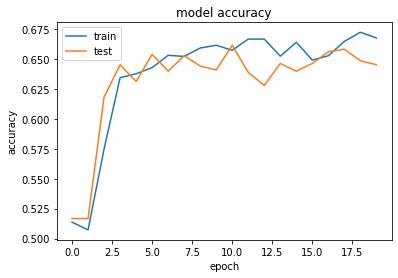

In [49]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

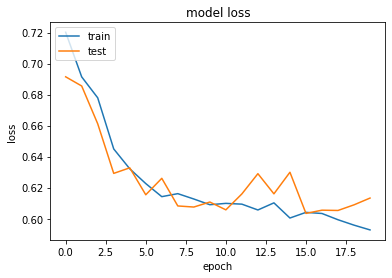

In [50]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()